# Source Exploration with Pyspark

Now Corpus data is collected news websites, blogs or other web pages from 20 English-speaking countries. In this notebook we explored and made descriptive analysis of our sources of news. Data files are constructed in cluster and downloaded locally.

In [11]:
# Add your imports here
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

#import findspark
#findspark.init()

from pyspark.sql import *
import pyspark.sql.functions as sf
import re

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns 
from scipy.stats import pearsonr

In [12]:
# create the session
spark = SparkSession.builder.getOrCreate()
# create the context
sc = spark.sparkContext

In [13]:
DATA_DIR = './Data/data.parquet/'

In [20]:
sources = spark.read.parquet(DATA_DIR + "filter_sources.parquet")
urls = spark.read.parquet(DATA_DIR + "filter_urls.parquet")
websites = spark.read.parquet(DATA_DIR + "filter_websites.parquet")
words = spark.read.parquet(DATA_DIR + "filter_words.parquet")

Following graph shows how many urls we have for each country. Since each url is unique for each news, we can estimate how many news we have for each country. This numbers will later help us making reasonable comparison.

Here we can see that some counries like Jamaica, Bangladesh, Hong Kong, Tanzania, Sri Lanka, Ghana have a few news than rest of the data. We must threfore be treated topic and correlations analysis with caution .

Text(0, 0.5, 'Number of Urls')

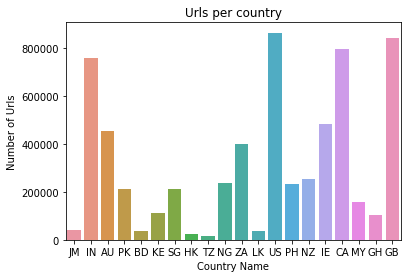

In [33]:
urls_pd = urls.toPandas()
ax = sns.barplot(x="country", y="count", data=urls_pd).set_title('Urls Per Country')
plt.xlabel('Country Name')
plt.ylabel('Number of Urls')

Here we can observe, number of unique sources are significantly higher for US and Great Britain which suggest that our sources for those countries are in diverge range of views less likely to be biased. On the other hand, number of unique sources for Bangladesh, Jamaica and Tanzania are too little. It is likely that news topic might be dominated by those websites.

Text(0, 0.5, 'Number of Unique Website')

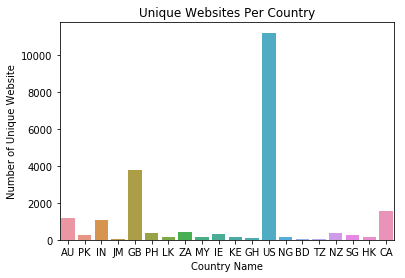

In [41]:
websites_pd = websites.toPandas()
ax = sns.barplot(x="country", y="websites_per_country", data=websites_pd).set_title('Unique Websites Per Country')
plt.xlabel('Country Name')
plt.ylabel('Number of Unique Website')

Here is word counts of all news we have per country. This is not a meaningful data for first glance but it helps us estimating processing time needed to perform topic modelling and classification. 

Text(0, 0.5, 'Number of Total Words in News')

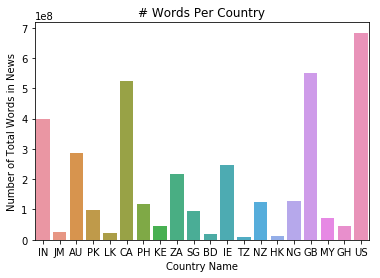

In [42]:
words_pd = words.toPandas()
ax = sns.barplot(x="country", y="words_per_country", data=words_pd).set_title('# Words Per Country')
plt.xlabel('Country Name')
plt.ylabel('Number of Total Words in News')